In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

Motion of a particle in two-dimensions, where both the $x$ and $y$ coordinates of the particle are independently under a Hooke’s Law-like restoring force,

$$ \frac{d^2x}{dt^2} -\omega_{x}^{2}x $$
$$ \frac{d^2y}{dt^2} -\omega_{y}^{2}y $$

We have that $x$ and $y$ can be written as the following parametrized functions:

$$ x(t) = A\sin(\omega_xt) $$
$$ y(t) = B\sin(\omega_yt + \delta) $$

In [2]:
def lissajous_curve(A: float, B:float , wx:list , wy:list, delta:float, t_arr: np.ndarray) -> tuple:
    """
        Generate a Lissajous curve with the given parameters.
        Args:
            A (float): Amplitude of the x-axis
            B (float): Amplitude of the y-axis
            wx (list): Angular frequency of the x-axis
            wy (list): Angular frequency of the y-axis
            delta (float): Phase difference between the x-axis and y-axis
            t_arr (np.ndarray): Time array

        Returns:
            x (np.ndarray): x-axis values
            y (np.ndarray): y-axis values
    """
    x = A*np.sin(wx*t_arr)
    y = B*np.sin(wy*t_arr + delta)
    
    return x,y

In [3]:
def plot_lissajous_curves(wxs:list, wys:list, deltas:list, t_arr:np.ndarray) -> None:
    """ 
        Plot the Lissajous curves for the given parameters.
        Args:
            wxs (list): Angular frequency of the x-axis
            wys (list): Angular frequency of the y-axis
            deltas (list): Phase difference between the x-axis and y-axis
            t_arr (np.ndarray): Time array
            
        Returns:
            None
    """
    # Create the subplots
    fig, axs = plt.subplots(len(wxs), len(deltas), figsize=(10, 10))
    fig.subplots_adjust(wspace=0, hspace=0)

    # Remove the ticks and labels from the x-axis of all subplots
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.spines['top'].set_visible(False)     # Remove the top border
        ax.spines['right'].set_visible(False)   # Remove the right border
        ax.spines['bottom'].set_visible(False)  # Remove the bottom border
        ax.spines['left'].set_visible(False)    # Remove the left border

    # Set the x-axis labels for the top row of subplots
    xlabels = ['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
    for j, xlabel in enumerate(xlabels):
        axs[0, j].set_title(xlabel, pad=10)

    # Plot the curves and set the y-axis labels for the first column of subplots
    for i, (wx, wy) in enumerate(zip(wxs, wys)):
        for j, delta in enumerate(deltas):
            x, y = lissajous_curve(1, 1, wx, wy, delta, t_arr)
            axs[i, j].plot(x, y, '', linewidth=0.5)
            if j == 0:
                axs[i, j].set_ylabel(f'{wx}:{wy}', rotation=0, labelpad=10)

    # Set the DPI and show the plot
    # fig.dpi = 300
    plt.show()

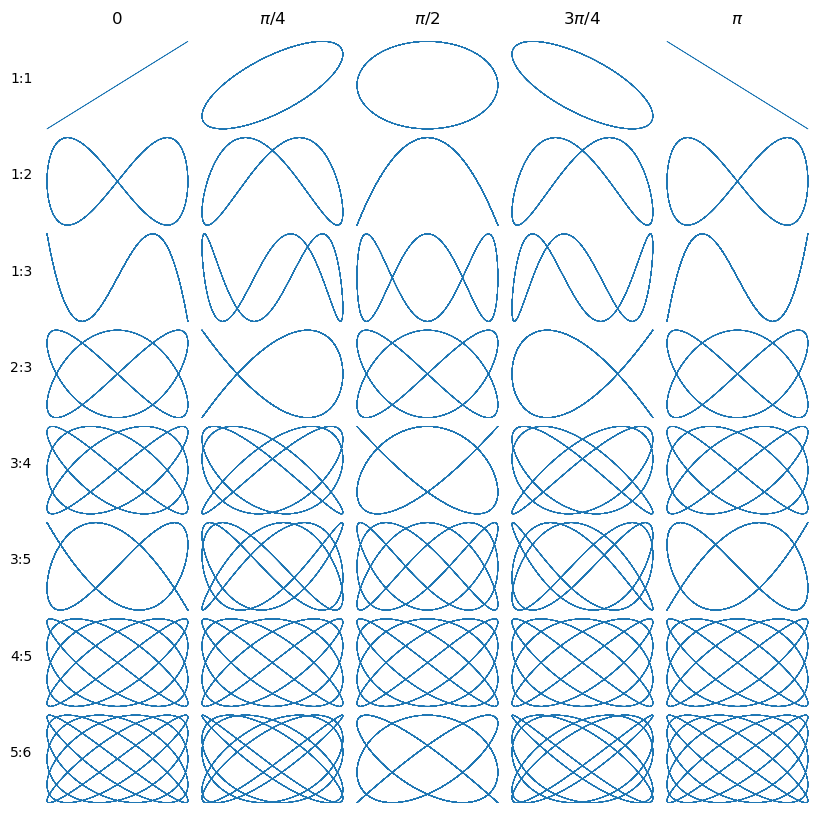

In [4]:
wxs = [1, 1, 1, 2, 3, 3, 4, 5]
wys = [1, 2, 3, 3, 4, 5, 5, 6]
deltas = [0, math.pi/4, math.pi/2, 3*math.pi/4, math.pi]
t_arr = np.linspace(0,30*math.pi, 10000)

plot_lissajous_curves(wxs, wys, deltas, t_arr)

## Mandelbrot's set

$$z_{n+1} = z_n^{2}+c$$

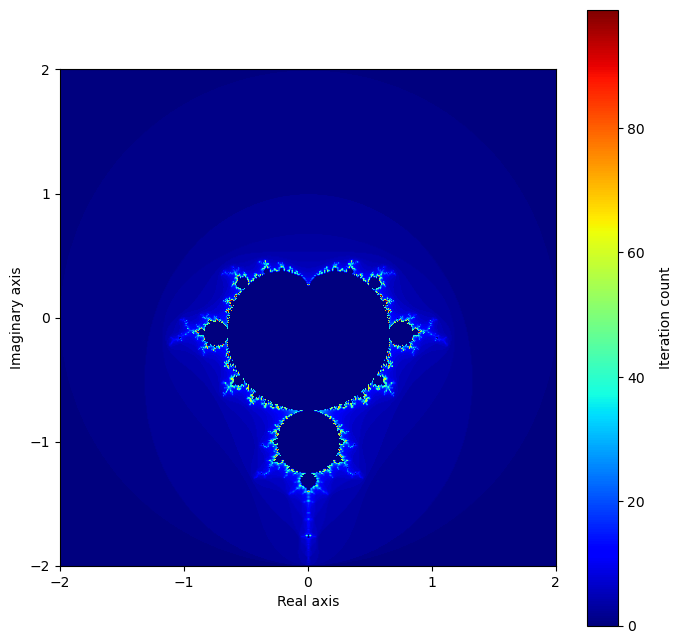

In [6]:
def plot_mandelbrot_set(xmin:float, xmax:float, ymin:float, ymax:float, nx:int, ny:int, max_iter:int, cmap=None) -> None:
    """ 
        Plot the Mandelbrot set for the given parameters.
        
        Args:
            xmin (float): Minimum value of the real axis
            xmax (float): Maximum value of the real axis
            ymin (float): Minimum value of the imaginary axis
            ymax (float): Maximum value of the imaginary axis
            nx (int): Number of points along the real axis
            ny (int): Number of points along the imaginary axis
            max_iter (int): Maximum number of iterations
            cmap (str): Colormap, default is None
            
        Returns:
            None
    """
    if cmap is None:
        x = np.linspace(xmin, xmax, nx, endpoint=True)
        y = np.linspace(ymin, ymax, nx, endpoint=True)
        mandelflag = np.zeros([nx, nx])

        for i in range(nx):
            for k in range(nx):
                z = 0
                c = complex(x[i], y[k])
                for l in range(max_iter):
                    z = z * z + c
                    if abs(z) > 2:
                        mandelflag[i, k] = 1
                        break

        plt.imshow(mandelflag, cmap='binary', extent=(xmin, xmax, ymin, ymax))
        plt.gray()
        plt.colorbar()
    else:
        # Create the complex plane
        x = np.linspace(xmin, xmax, nx)
        y = np.linspace(ymin, ymax, ny)
        c = x[:, np.newaxis] + 1j * y[np.newaxis, :]

        # Initialize the iteration count and the escape radius
        z = np.zeros_like(c)
        count = np.zeros_like(c, dtype=int)
        r = 2.0

        # Iterate the Mandelbrot equation until the escape condition is met
        for i in range(max_iter):
            z = z**2 + c
            mask = (count == 0) & (np.abs(z) > r)
            count[mask] = i
            z[mask] = np.nan

        # Plot the Mandelbrot set with colors based on the iteration count
        fig, ax = plt.subplots(figsize=(8, 8))
        im = ax.imshow(count, cmap=cmap, origin='lower', extent=(xmin, xmax, ymin, ymax))

        # Add a colorbar to the plot
        cbar = fig.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Iteration count', rotation=90, labelpad=10)

    plt.xlabel('Real axis')
    plt.ylabel('Imaginary axis')
    plt.xticks(np.linspace(xmin, xmax, 5))
    plt.yticks(np.linspace(ymin, ymax, 5))
    plt.show()
    
plot_mandelbrot_set(-2, 2, -2, 2, 500, 500, 100, cmap='jet')

## Accuracy of your Quadratic Solver

$$ x_\pm = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

In [139]:
def my_quadratic_solver(a: float, b: float, c: float) -> np.array([float]):
    """
        Calculates the roots of a quadratic equation

        Args:
            a (float): the coefficient of x^2
            b (float): the coefficient of x
            c (float): the constant term
        
        Returns:
            NP.Array: An array of the roots of the quadratic equation
    """
    # get the square root term and the divisor
    sqrt_term = math.sqrt(b**2 - 4*a*c)
    divisor = 2*a
    # calculate the roots
    x1 = (-b + sqrt_term) / divisor
    x2 = (-b - sqrt_term) / divisor
    # return the roots
    return np.array([x1, x2])

Solving for 
$$ 0.001x^2 + 1000x + 0.001 = 0$$

In [140]:
roots = my_quadratic_solver(0.001, 1000, 0.001)
roots

array([-9.99989425e-07, -1.00000000e+06])

$$ 
    \bigg(\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}\bigg)\bigg(\frac{-b \mp \sqrt{b^2 - 4ac}}{-b \mp \sqrt{b^2 - 4ac}}\bigg)  
$$
assuing the first $\pm$ is $+$ then $\mp$ is $-$
$$
    \frac{(-b + \sqrt{b^2 - 4ac})(-b - \sqrt{b^2 - 4ac})}{2a(-b - \sqrt{b^2 - 4ac})}
$$
$$
    (-b + \sqrt{b^2 - 4ac})(-b - \sqrt{b^2 - 4ac}) = b^2 - b\sqrt{b^2 - 4ac} + b\sqrt{b^2 - 4ac} - (\sqrt{b^2 - 4ac})^2
$$
$$
    = 4ac
$$

$$ 
    \frac{4ac}{2a(-b-\sqrt{b^2 - 4ac})} = \frac{2c}{-b-\sqrt{b^2 - 4ac}}
$$

assuing the first $\pm$ is $-$ then $\mp$ is $+$
$$
    \frac{(-b - \sqrt{b^2 - 4ac})(-b + \sqrt{b^2 - 4ac})}{2a(-b + \sqrt{b^2 - 4ac})}
$$
$$
    (-b - \sqrt{b^2 - 4ac})(-b + \sqrt{b^2 - 4ac}) = b^2 + b\sqrt{b^2 - 4ac} - b\sqrt{b^2 - 4ac} - (\sqrt{b^2 - 4ac})^2
$$
$$
    = 4ac
$$

$$ 
    \frac{4ac}{2a(-b+\sqrt{b^2 - 4ac})} = \frac{2c}{-b+\sqrt{b^2 - 4ac}}
$$
Therefore, multiplying the both the numerator and denominator by $-b \mp \sqrt{b^2 - 4ac}$ makes the roots the following form:

$$
    \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}
$$


In [141]:
def modified_quadratic_solver(a: float, b: float, c: float) -> np.array([float]):
    """
        Calculates the roots of a quadratic equation

        Args:
            a (float): the coefficient of x^2
            b (float): the coefficient of x
            c (float): the constant term
        
        Returns:
            NP.Array: An array of the roots of the quadratic equation
    """
    
    sqrt_term = math.sqrt(b**2 - 4*a*c)
    numerator = 2*c
    
    x1 = numerator / (-b - sqrt_term)
    x2 = numerator / (-b + sqrt_term)
    
    return np.array([x1, x2])

In [142]:
roots = modified_quadratic_solver(0.001, 1000, 0.001)
roots

array([-1.00000000e-06, -1.00001058e+06])

In [143]:
def good_quadratic_solver(a: float, b: float, c: float) -> np.array([float]):
    """
        Calculates the roots of a quadratic equation

        Args:
            a (float): the coefficient of x^2
            b (float): the coefficient of x
            c (float): the constant term
        
        Returns:
            NP.Array: An array of the roots of the quadratic equation
    """
    sqrt_term = math.sqrt(b**2 - 4*a*c)
    numerator = 2*c
    
    # The good root is the one which does not suffer from catastrophic subtraction.
    x1 = numerator / (-b - sqrt_term)
    x2 = c / (a*x1)
    
    return np.array([x1, x2])
    

In [144]:
roots = good_quadratic_solver(0.001, 1000, 0.001)
roots

array([-1.e-06, -1.e+06])